# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
#n is the number of times to roll the dice
def dice_simulator(n):
    return [random.choice([1,2,3,4,5,6]) for i in range (n)]

In [51]:
df = pd.DataFrame({'Output':dice_simulator(10)})
df

,Output
0,6
1,6
2,3
3,5
4,2
5,6
6,5
7,5
8,1
9,5


#### 2.- Plot the results sorted by value.

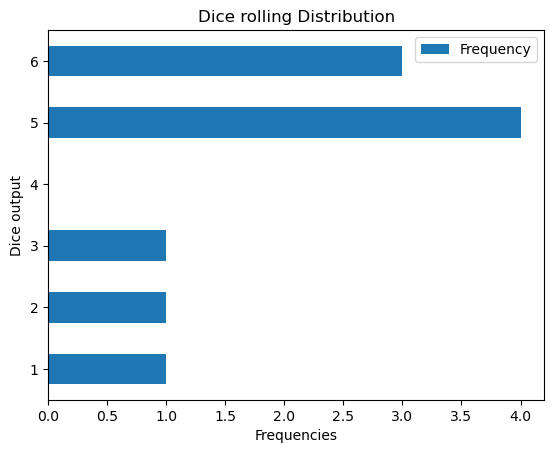

In [52]:
frequencies = [(df['Output'] == i).sum() for i in range(1,7)]

df_freq = pd.DataFrame({'Frequency':frequencies})
df_freq.index = pd.RangeIndex(start=1, stop=len(df_freq)+1, step=1)

df_freq.plot.barh(y='Frequency')
plt.xlabel('Frequencies')
plt.ylabel('Dice output')
plt.title('Dice rolling Distribution')
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<Axes: title={'center': 'Output'}>]], dtype=object)

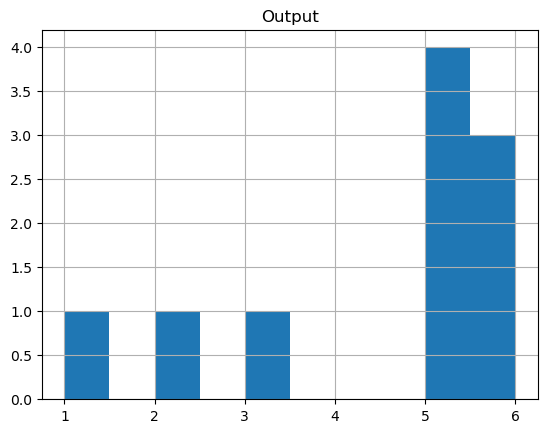

In [54]:
df_sorted = df.sort_values('Output')
df_sorted.hist()

In [ ]:
"""
your comments here
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [126]:
def handmade_mean(l):
    return sum(l)/len(l)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [64]:
df = pd.DataFrame({'Output':dice_simulator(10)})

outputs = [i for i in range(1,7)]
frequencies = [(df['Output'] == i).sum() for i in range(1,7)]

df1 = pd.DataFrame({'Output':outputs,'Frequency':frequencies})
df1

,Output,Frequency
0,1,1
1,2,1
2,3,0
3,4,2
4,5,1
5,6,5


In [72]:
handmade_m = sum([df1['Output'][i]*df1['Frequency'][i] for i in range(len(df1))])/len(df)
handmade_m

4.6

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [87]:
def handmade_median(l):
    l = sorted(l)
    print(l)
    length = len(l)
    if length%2 == 0:
        return ( l[int( length/2-1 )] + l[int( length/2)] ) / 2
    else:
        return l[int ( (length-1)/2 )]

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [105]:
#l is the list of numbers and q is either 1, 2 or 3, depending on the quartile to be computed.
def handmade_quartiles(l,q):
    length = len(l)
    l = sorted(l)
    if q == 2:
        return handmade_median(l)
    elif q == 1:
        if (length+1)%4 == 0:
            return l[int( (length+1)/4 )-1]
        else:
            return (l[ int( (length+1)/4 ) -1] + l[int( (length+1)/4 ) ]) / 2
    elif q == 3:
        if (3*(length+1))%4 == 0:
            return l[int( 3*(length+1)/ 4 )-1]
        else:
            return (l[ int( 3*(length+1)/ 4 )-1] + l[int( 3*(length+1)/ 4 )]) / 2

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [118]:
df = pd.read_csv('roll_the_dice_hundred.csv')

<Axes: xlabel='roll', ylabel='value'>

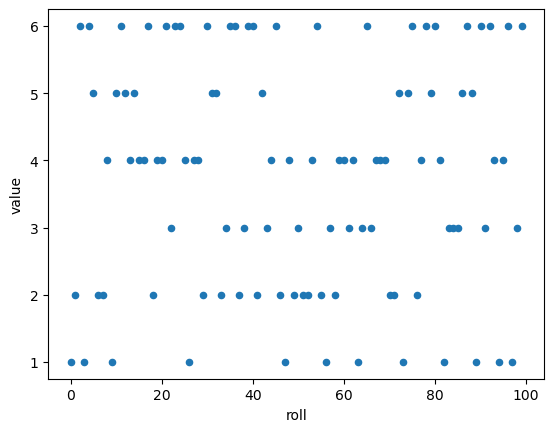

In [119]:
df.plot(kind='scatter', x='roll', y='value')

In [ ]:
"""
Looks like they are all very closely distributed,
and from the graphic it seems like 6 is the most common result, while 5 is the less common one
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [127]:
#Mean
handmade_mean(list(df['value']))

3.74

#### 3.- Now, calculate the frequency distribution.


In [132]:
frequencies = [(df['value'] == i).sum() for i in range(1,7)]
values = [i for i in range(1,7)]

df_freq = pd.DataFrame({'value':values, 'frequency':frequencies})

df_freq

,value,frequency
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

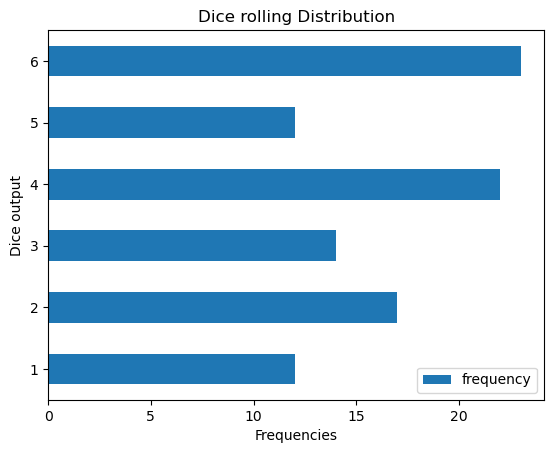

In [133]:
df_freq.plot.barh(x='value', y='frequency')
plt.xlabel('Frequencies')
plt.ylabel('Dice output')
plt.title('Dice rolling Distribution')
plt.show()

In [ ]:
"""
We see that 1, 2, 3 and 5 have similar frequencies.
However, 4 and 6 appeared more than the rest.
Hence the mean is moved towards 4.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [138]:
df = pd.read_csv('roll_the_dice_thousand.csv')

In [139]:
#Mean
handmade_mean(list(df['value']))

3.447

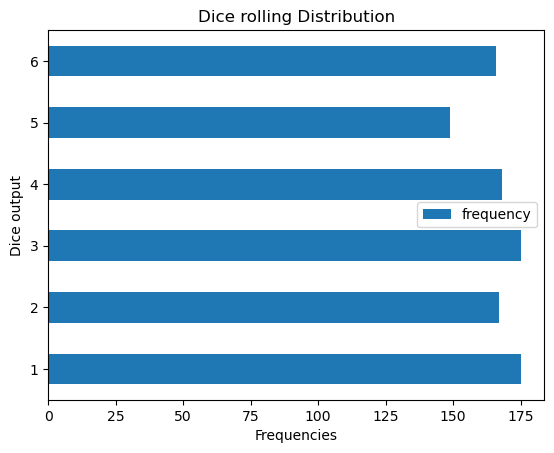

In [140]:
frequencies = [(df['value'] == i).sum() for i in range(1,7)]
values = [i for i in range(1,7)]

df_freq = pd.DataFrame({'value':values, 'frequency':frequencies})

df_freq.plot.barh(x='value', y='frequency')
plt.xlabel('Frequencies')
plt.ylabel('Dice output')
plt.title('Dice rolling Distribution')
plt.show()

In [ ]:
"""
The mean is now closer to 3, hence the values have now more similar frequencies.
We can expect that the more times we roll the dice the more similar will be the frequencies,
since the probabilities of getting any of the nummbers are equal.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([[<Axes: title={'center': 'observation'}>]], dtype=object)

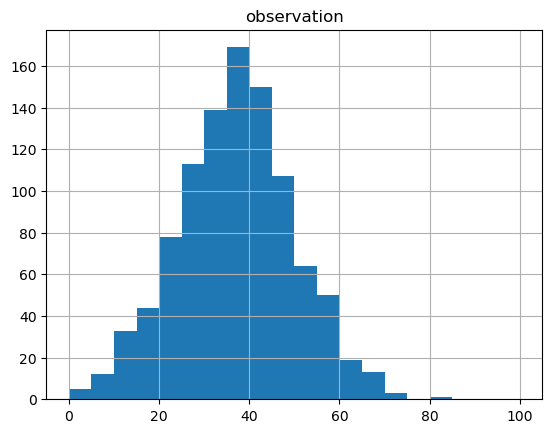

In [4]:
ages = pd.read_csv('ages_population.csv')
ages.hist(bins=range(0, 101, 5))
#look hitplot

In [ ]:
"""
By looking at the graphic it looks like the median might be in the range [30,40] while the mean should be in the interval [40,50].
"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [149]:
#Median
ages['observation'].median()

37.0

In [150]:
#Mean
ages['observation'].mean()

36.56

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<Axes: title={'center': 'observation'}>]], dtype=object)

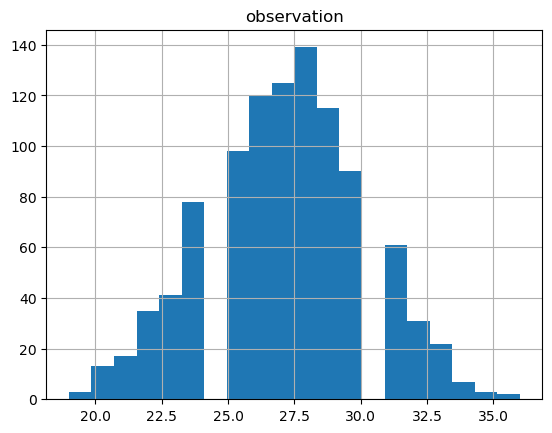

In [7]:
ages2 = pd.read_csv('ages_population2.csv')
# ages2.hist(bins=range(0, 101, 5))
ages2.hist(bins=20)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [10]:
ages2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<Axes: title={'center': 'observation'}>]], dtype=object)

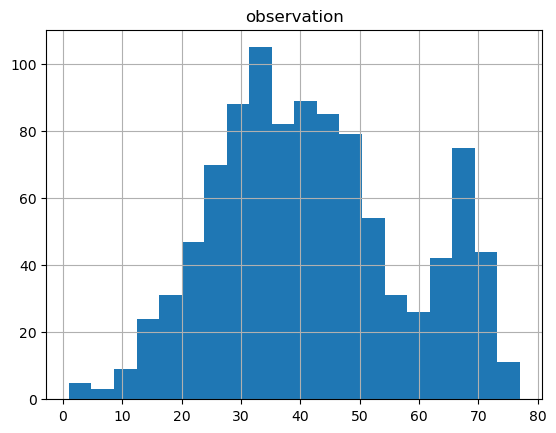

In [11]:
ages3 = pd.read_csv('ages_population3.csv')
# ages2.hist(bins=range(0, 101, 5))
ages3.hist(bins=20)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""